In [ ]:
!pip install tensorflow-gpu==2.0.0


     |████████████████████████████████| 380.8MB 44kB/s 
     |████████████████████████████████| 51kB 7.1MB/s 
     |████████████████████████████████| 3.8MB 52.2MB/s 
     |████████████████████████████████| 450kB 44.3MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7542 sha256=53e5063ab933394035390768372b8195cc24a42877a3fe204f8f35a5276d2804
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow 2.3.0 has requirement gast==0.3.3, but you'll have gast 0.2.2 which is incompatible.
ERROR: tensorflow 2.3.0 has requirement tensorboard<3,>=2.3.0, but you'll have tensorboard 2.0.2 which is incompatible.
ERROR: tensorflow 2.3.0 has requirement tensorflow-estimator<2.4.0,>=2.3.0, but you'll have tensorflow-estimator 2.0.1 which is incompatible.
ERROR: tensorflow-probability 0.11.0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing ins

In [ ]:
!nvidia-smi

Fri Sep 25 10:44:42 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.66       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P8     9W /  70W |      0MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import tensorflow 
from tensorflow.keras.layers import *
from tensorflow.keras.preprocessing import image  
from tensorflow.keras.models import *
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
train_path = '/content/drive/My Drive/Colab Notebooks/Covid/Train'
test_path = '/content/drive/My Drive/Colab Notebooks/Covid/Test'

In [ ]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu', input_shape=(224,224,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(3,3)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(3,3)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(3,3)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(2,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 73, 73, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 73, 73, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 71, 71, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 23, 23, 64)       

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_data = ImageDataGenerator(rescale = 1./255,shear_range = 0.2,zoom_range = 0.2,horizontal_flip = True)
test_data = ImageDataGenerator(rescale = 1./255)

In [ ]:
train_set = train_data.flow_from_directory(train_path,target_size = (224,224),batch_size = 16,class_mode = 'categorical')
test_set = test_data.flow_from_directory(test_path,target_size = (224,224),batch_size = 16,class_mode = 'categorical')

Found 405 images belonging to 2 classes.
Found 43 images belonging to 2 classes.


In [ ]:
train_set.class_indices

{'Negative': 0, 'Positive': 1}

In [ ]:
covid = model.fit(train_set,validation_data=test_set,epochs=20,steps_per_epoch=len(train_set),validation_steps=len(test_set))

Train for 26 steps, validate for 3 steps
Epoch 1/20
26/26 [==============================] - 19s 731ms/step - loss: 0.1123 - accuracy: 0.9556 - val_loss: 0.3050 - val_accuracy: 0.8837
Epoch 2/20
26/26 [==============================] - 18s 680ms/step - loss: 0.3251 - accuracy: 0.9210 - val_loss: 0.6154 - val_accuracy: 0.6977
Epoch 3/20
26/26 [==============================] - 18s 685ms/step - loss: 0.1184 - accuracy: 0.9556 - val_loss: 0.4217 - val_accuracy: 0.7907
Epoch 4/20
26/26 [==============================] - 18s 698ms/step - loss: 0.0825 - accuracy: 0.9630 - val_loss: 0.3028 - val_accuracy: 0.8372
Epoch 5/20
26/26 [==============================] - 18s 682ms/step - loss: 0.0712 - accuracy: 0.9753 - val_loss: 0.9047 - val_accuracy: 0.6977
Epoch 6/20
26/26 [==============================] - 18s 680ms/step - loss: 0.0560 - accuracy: 0.9827 - val_loss: 0.8468 - val_accuracy: 0.7674
Epoch 7/20
26/26 [==============================] - 18s 681ms/step - loss: 0.0400 - accuracy: 0.9877 

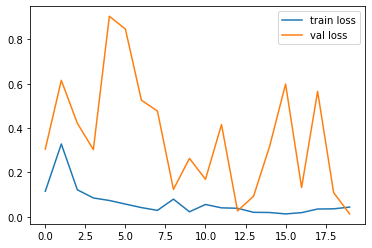

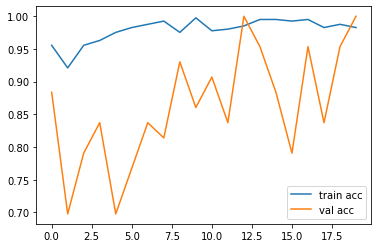

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(covid.history['loss'], label='train loss')
plt.plot(covid.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(covid.history['accuracy'], label='train acc')
plt.plot(covid.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
!pip install pyyaml h5py

In [ ]:
model.save('covid.h5')